# Scroll down for EDA on mental health providers

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# https://www.kff.org/other/state-indicator/opioid-overdose-death-rates/?currentTimeframe=1&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

In [4]:
rx_state_df = pd.read_csv('data/opioid_rx_state_level.csv')
rx_state_df = rx_state_df.drop(columns=['Unnamed: 3'])
rx_state_df.sort_values(by='Dispensing_Rate', ascending=False).head(10)

,Year,State,Dispensing_Rate
201,2009,WV,146.9
150,2008,WV,145.5
306,2012,AL,143.8
252,2010,WV,143.1
357,2013,AL,142.4
246,2010,TN,140.0
303,2011,WV,139.6
297,2011,TN,138.5
195,2009,TN,138.4
272,2011,KY,137.0


In [5]:
rx_state_df.isnull().sum()

Year               0
State              0
Dispensing_Rate    0
dtype: int64

In [6]:
death_state_df = pd.read_csv('data/opioid_deaths_state.csv')
death_state_df[death_state_df['Opioid Overdose Death Rate (Age-Adjusted)'].isin(['NSD', 'NR'])]

,Year,State,Opioid Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted)
34,2006,ND,NSD,NR
50,2006,WY,NR,10.6
52,2007,AK,NR,10.1
85,2007,ND,NR,4.8
161,2009,DC,NSD,4.1
187,2009,ND,NSD,4.4
238,2010,ND,NSD,3.4
289,2011,ND,NSD,NSD
340,2012,ND,NSD,3.1
391,2013,ND,NSD,2.8


In [7]:
death_state_df = death_state_df[~death_state_df['Opioid Overdose Death Rate (Age-Adjusted)'].isin(['NSD', 'NR'])]
death_state_df['Opioid Overdose Death Rate (Age-Adjusted)'] = death_state_df['Opioid Overdose Death Rate (Age-Adjusted)'].astype(float)
death_state_df.sort_values(by='Opioid Overdose Death Rate (Age-Adjusted)', ascending=False).head(10)

,Year,State,Opioid Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted)
762,2020,WV,70.0,81.4
609,2017,WV,49.6,57.8
722,2020,DC,45.3,58.1
721,2020,DE,43.9,47.3
558,2016,WV,43.4,52
670,2019,DE,43.0,48
660,2018,WV,42.4,51.5
711,2019,WV,41.4,52.8
734,2020,MD,40.4,44.6
731,2020,KY,40.2,49.2


Text(0, 0.5, 'Opioid Dispensing Rate')

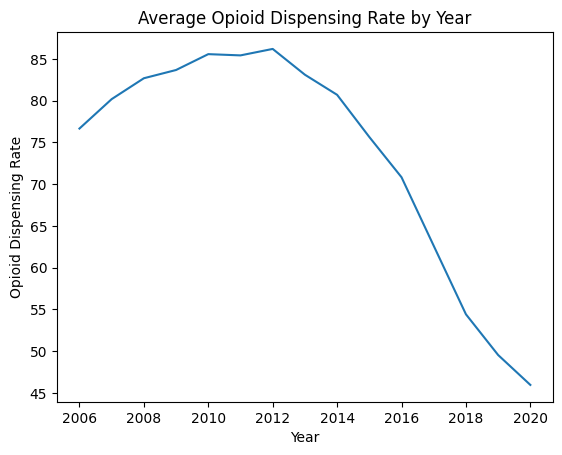

In [8]:
rx_state_df.groupby('Year').Dispensing_Rate.mean().plot.line()
plt.title('Average Opioid Dispensing Rate by Year')
plt.ylabel('Opioid Dispensing Rate')

Text(0, 0.5, 'Opioid Overdose Death Rate')

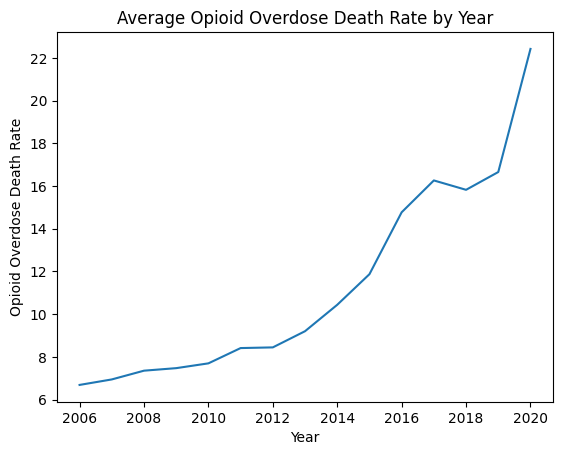

In [9]:
death_state_df.groupby('Year')['Opioid Overdose Death Rate (Age-Adjusted)'].mean().plot.line()
plt.title('Average Opioid Overdose Death Rate by Year')
plt.ylabel('Opioid Overdose Death Rate')

In [10]:
rx_death = pd.merge(rx_state_df, death_state_df, on=['State', 'Year'])
rx_death.sample(5)

,Year,State,Dispensing_Rate,Opioid Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted)
398,2014,AL,135.2,5.6,15.2
532,2016,NY,42.7,15.1,18
153,2009,CA,55.6,5.2,10.7
113,2008,IA,59.1,4.4,7.2
412,2014,IN,96.7,7.3,18.2


Text(0.5, 0, 'Opioid Dispensing Rate')

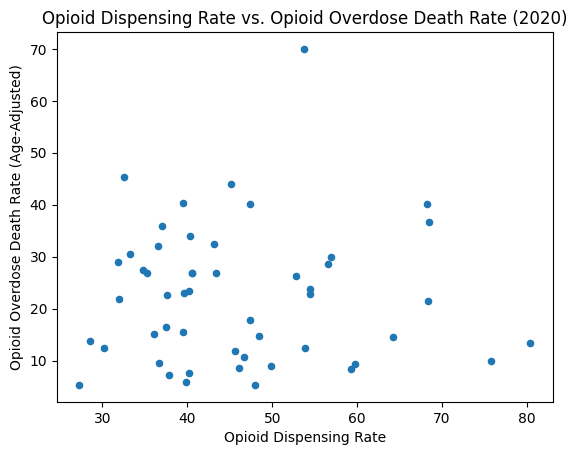

In [11]:
rx_death[rx_death.Year == 2020].plot.scatter(x='Dispensing_Rate', y='Opioid Overdose Death Rate (Age-Adjusted)')
plt.title('Opioid Dispensing Rate vs. Opioid Overdose Death Rate (2020)')
plt.xlabel('Opioid Dispensing Rate')

# BELOW IS MENTAL HEALTH PROVIDERS EDA

In [13]:
sdoh_df = pd.read_excel("./data/SDOH_2020_COUNTY_1_0.xlsx", sheet_name="Data")

143     0.0763
3086    0.0248
2347    0.0147
471     0.0000
2542    0.0538
Name: AMFAR_MHFAC_RATE, dtype: float64

In [16]:
mental_health_df = sdoh_df[['COUNTYFIPS', 'STATE', 'COUNTY', 'REGION', 'AMFAR_MHFAC_RATE']]
mental_health_df.sample(5)

,COUNTYFIPS,STATE,COUNTY,REGION,AMFAR_MHFAC_RATE
319,10003,Delaware,New Castle County,South,0.0285
1422,28039,Mississippi,George County,South,0.0409
1257,26049,Michigan,Genesee County,Midwest,0.0296
628,17063,Illinois,Grundy County,Midwest,0.0196
2396,46067,South Dakota,Hutchinson County,Midwest,0.0000


In [19]:
mental_health_df[mental_health_df.AMFAR_MHFAC_RATE.isnull()]

,COUNTYFIPS,STATE,COUNTY,REGION,AMFAR_MHFAC_RATE
72,2063,Alaska,Chugach Census Area,West,NaN
73,2066,Alaska,Copper River Census Area,West,NaN
3144,60050,American Samoa,Western District,NaN,NaN
3145,66010,Guam,Guam,NaN,NaN
3146,69100,Northern Mariana Islands,Rota,NaN,NaN
3147,69120,Northern Mariana Islands,Tinian Municipality,NaN,NaN
3226,78010,US Virgin Islands,St. Croix,NaN,NaN
3227,78020,US Virgin Islands,St. John Island,NaN,NaN
3228,78030,US Virgin Islands,St. Thomas Island,NaN,NaN


In [26]:
mental_health_df = mental_health_df[~mental_health_df.AMFAR_MHFAC_RATE.isnull()]
mental_health_df.COUNTYFIPS = mental_health_df.COUNTYFIPS.astype(float)

In [25]:
death_df = pd.read_csv("data/OpioidDeaths_2020.txt", sep="\t")
death_df = death_df.drop(columns="Notes")

death_df = death_df[death_df['Crude Rate'] != 'Unreliable']
death_df['Crude Rate'] = death_df['Crude Rate'].astype(float)
death_df.sort_values(by='Crude Rate', ascending=False).head(15)

,County,County Code,Deaths,Population,Crude Rate
878,"McDowell County, WV",54047.0,27.0,16916.0,159.6
877,"Logan County, WV",54045.0,44.0,31688.0,138.9
336,"Baltimore city, MD",24510.0,777.0,586131.0,132.6
621,"Scioto County, OH",39145.0,95.0,74347.0,127.8
868,"Cabell County, WV",54011.0,112.0,91589.0,122.3
888,"Raleigh County, WV",54081.0,86.0,72920.0,117.9
890,"Wayne County, WV",54099.0,46.0,39054.0,117.8
840,"Petersburg city, VA",51730.0,33.0,30446.0,108.4
727,"Cheatham County, TN",47021.0,39.0,41101.0,94.9
411,"St. Louis city, MO",29510.0,270.0,297645.0,90.7


In [28]:
death_mental_df = death_df.merge(mental_health_df, left_on='County Code', right_on='COUNTYFIPS', how='inner')
death_mental_df.sample(5)

,County,County Code,Deaths,Population,Crude Rate,COUNTYFIPS,STATE,COUNTY,REGION,AMFAR_MHFAC_RATE
509,"Nueces County, TX",48355.0,32.0,363148.0,8.8,48355.0,Texas,Nueces County,South,0.0165
336,"Caldwell County, NC",37027.0,24.0,82100.0,29.2,37027.0,North Carolina,Caldwell County,South,0.0122
431,"Indiana County, PA",42063.0,28.0,83664.0,33.5,42063.0,Pennsylvania,Indiana County,Northeast,0.0359
161,"Linn County, IA",19113.0,37.0,227854.0,16.2,19113.0,Iowa,Linn County,Midwest,0.0307
444,"Philadelphia County, PA",42101.0,913.0,1578487.0,57.8,42101.0,Pennsylvania,Philadelphia County,Northeast,0.0431


Text(0, 0.5, 'Opioid Overdose Death Rate')

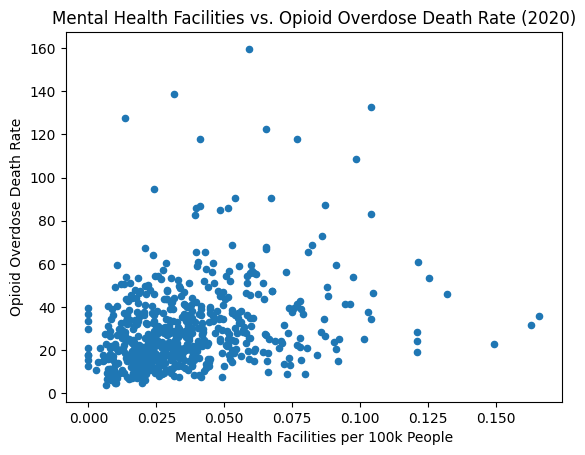

In [30]:
death_mental_df.plot.scatter(x='AMFAR_MHFAC_RATE', y='Crude Rate')
plt.title('Mental Health Facilities vs. Opioid Overdose Death Rate (2020)')
plt.xlabel('Mental Health Facilities per 100k People')
plt.ylabel('Opioid Overdose Death Rate')